In [153]:
# Dependencies and Setup
import json
import requests
from config import api_key     # Import API key
import random
import matplotlib.pyplot as plt  # Create graphs
import numpy as np
import pandas as pd
import csv
import time

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [154]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

628

In [155]:
print(type(cities)) 

<class 'list'>


In [156]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [157]:
#cities1 = cities[0:550] # can only pull 20 cities within 1 minute
# set up lists to hold reponse info
lon = []
lat = []
temp = []  # max temperature in celsius
humidity=[]  # percent humidity
speed = []  # miles per hour wind speed
clouds = []  # percent cloudiness
id = []
name = []
i = 1

# APPLYED TRY AND EXCEPT TO SLOW DOWN FOR KEY ERRORS 
# Loop through the list of cities and perform a request for data on each
while i <= 500:
    for city in cities:
        response = requests.get(query_url + city).json()
        try:
            lat.append(response['coord']['lat']) 
            lon.append(response['coord']['lon'])
            temp.append(response['main']['temp_max'])
            humidity.append(response["main"]["humidity"])
            speed.append(response["wind"]["speed"])
            clouds.append(response["clouds"]["all"])
            id.append(response["id"])
            name.append(response["name"])
            try:
                print(f"Downloading city ", i )
                i+=1
            except KeyError:
                print()
        except KeyError:     
            print()
print("End of downloading.")
















End of downloading.


In [158]:
# create a data frame from cities information
weather_dict = {
    "city id": id,
    "city": name,
    "lat": lat,
    "lon": lon,
    "max_temp": temp,
    "humidity": humidity,
    "speed": speed,
    "clouds": clouds,
    }
weather_data = pd.DataFrame(weather_dict)

# sort based upon multiple columns
weather_data = weather_data.sort_values(
    ["city", "lat"], ascending=True)

# The index can be reset to provide index numbers 
weather_data = weather_data.reset_index(drop=True)

weather_data

,city id,city,lat,lon,max_temp,humidity,speed,clouds
0,110690,Abha,18.22,42.50,22.00,49,0.61,20
1,584365,Abrau-Dyurso,44.70,37.60,22.00,88,4.00,40
2,292968,Abu Dhabi,24.47,54.37,35.00,66,1.50,5
3,3587498,Acajutla,13.59,-89.83,28.76,76,4.16,100
4,3533462,Acapulco,16.86,-99.88,28.00,88,0.14,40
5,2293428,Adiake,5.29,-3.30,25.00,88,4.60,40
6,2508813,Adrar,27.87,-0.29,30.00,11,6.20,0
7,1651810,Airai,-8.93,125.41,28.43,53,1.57,1
8,601551,Akdepe,42.05,59.39,30.00,14,3.10,0
9,5882953,Aklavik,68.22,-135.01,17.00,42,4.10,20


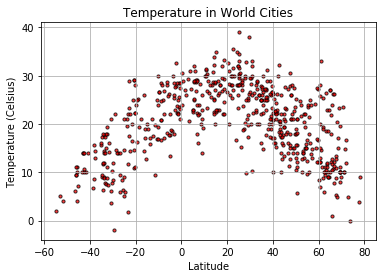

 Cities near the equator experience a higher maximum temperature.


In [159]:
# plot scatter temp vs lat - The size of each point on our plot is determined by their x value
x_data = weather_data["lat"]
y_data = weather_data["max_temp"]

plt.scatter(x_data, y_data, marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.75)

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot and observations
plt.show()

print(f" Cities near the equator experience a higher maximum temperature.")

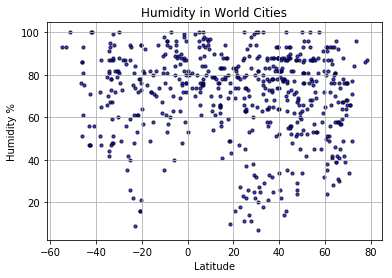

 Most cities experience humity between 40 to 94 percent.
 A few cities 20 to 40 degree latitude north of equator are very arid.
 We cannot infer much relationships between % humidity and latitude.


In [160]:
# plot humidity vs lat
# plot scatter humidity vs lat - The size of each point on our plot is determined by their x value
x_data = weather_data["lat"]
y_data = weather_data["humidity"]

plt.scatter(x_data, y_data, marker="o", facecolors="blue", edgecolors="black",
            s=10, alpha=0.75)

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot and observations
plt.show()

print(f" Most cities experience humity between 40 to 94 percent.")
print(f" A few cities 20 to 40 degree latitude north of equator are very arid.")
print(f" We cannot infer much relationships between % humidity and latitude.")

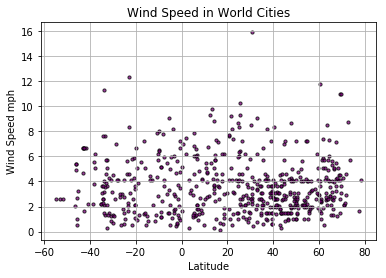

 Most cities experience wind speeds less than 8 mph. 
 Cities at all latitudes experience varying wind speeds. 
 We cannot infer a relationship between wind speed and latitude.


In [161]:
# plot wind
# plot scatter speed vs lat - The size of each point on our plot is determined by their x value
x_data = weather_data["lat"]
y_data = weather_data["speed"]

plt.scatter(x_data, y_data, marker="o", facecolors="purple", edgecolors="black",
            s=10, alpha=0.75)

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot and observations
plt.show()

print(f" Most cities experience wind speeds less than 8 mph. ")
print(f" Cities at all latitudes experience varying wind speeds. ")
print(f" We cannot infer a relationship between wind speed and latitude.")

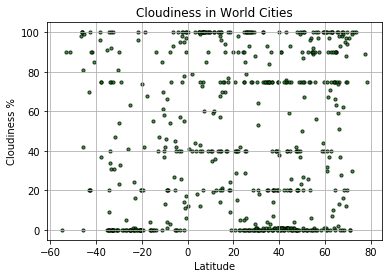

 Many cities between 40 and 70 degrees north of equator are 100% cloudy.
 Cities at all latitudes can be sunny except near the equator.
 There are limited information from cities north of 70 degrees and south of -40 degrees latitudes.
 We cannot infer a relationship between cloudiness and latitude.


In [162]:
# plot cloud
# plot scatter speed vs lat - The size of each point on our plot is determined by their x value
x_data = weather_data["lat"]
y_data = weather_data["clouds"]

plt.scatter(x_data, y_data, marker="o", facecolors="green", edgecolors="black",
            s=10, alpha=0.75)

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudsInWorldCities.png")

# Show plot and observations
plt.show()
print(f" Many cities between 40 and 70 degrees north of equator are 100% cloudy.")
print(f" Cities at all latitudes can be sunny except near the equator.")
print(f" There are limited information from cities north of 70 degrees and south of -40 degrees latitudes.")
print(f" We cannot infer a relationship between cloudiness and latitude.")